#### Applied Data Science 1- Assignment 2-Clustering and Fitting

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [221]:
df = pd.read_csv(r"C:\Users\Home\OneDrive - University of Hertfordshire\Clustering-assingment\gym_members_exercise_tracking.csv")
df_short=df.head(10)
df_short


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


In [223]:
df_dropped = df_short.dropna()
df_dropped.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [225]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [227]:
numcol=df_short.select_dtypes(include=[np.number])
numcol.corr()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
Age,1.000000,-0.207312,-0.425433,-0.199549,0.346188,0.517906,0.746661,0.639457,-0.671103,0.450013,0.611856,0.802280,0.067611
Weight (kg),-0.207312,1.000000,0.520292,-0.125398,-0.559860,-0.443378,0.224196,0.132674,0.017277,0.265211,0.122416,0.133462,0.801876
Height (m),-0.425433,0.520292,1.000000,-0.041020,-0.195064,-0.276031,-0.301525,-0.184117,-0.122923,0.498791,-0.058663,-0.268683,-0.089278
Max_BPM,-0.199549,-0.125398,-0.041020,1.000000,0.247793,-0.267019,-0.504253,-0.377078,0.206365,-0.183491,-0.466169,-0.336329,-0.106340
Avg_BPM,0.346188,-0.559860,-0.195064,0.247793,1.000000,0.614128,0.103435,0.400711,-0.507055,0.101166,-0.196512,0.029453,-0.502155
Resting_BPM,0.517906,-0.443378,-0.276031,-0.267019,0.614128,1.000000,0.403187,0.527685,-0.383509,0.018947,0.029356,0.180817,-0.304170
Session_Duration (hours),0.746661,0.224196,-0.301525,-0.504253,0.103435,0.403187,1.000000,0.913553,-0.651364,0.312157,0.532624,0.877541,0.468429
Calories_Burned,0.639457,0.132674,-0.184117,-0.377078,0.400711,0.527685,0.913553,1.000000,-0.752228,0.338838,0.263728,0.719657,0.287641
Fat_Percentage,-0.671103,0.017277,-0.122923,0.206365,-0.507055,-0.383509,-0.651364,-0.752228,1.000000,-0.684811,-0.399741,-0.678525,0.111111
Water_Intake (liters),0.450013,0.265211,0.498791,-0.183491,0.101166,0.018947,0.312157,0.338838,-0.684811,1.000000,0.308046,0.356774,-0.012312


#### PIE PLOT: Distribution of Workout Types

In [230]:
def plot_workout_type_pie_chart(data, column):
    """
    Creates a pie chart to visualize the distribution of categories in a specified column.
    """
    workout_type_counts = data[column].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(
        workout_type_counts,
        labels=workout_type_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors
    )
    plt.title('Distribution of Workout Types')
    plt.show()

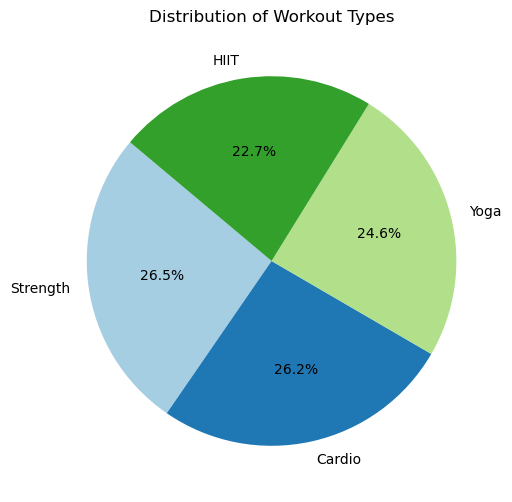

In [232]:
plot_workout_type_pie_chart(data=df, column='Workout_Type')

#### SCATTER PLOT: Age vs. Calories Burned

In [235]:
def plot_scatter(data, x_col, y_col, title='Scatter Plot', xlabel=None, ylabel=None, figsize=(10, 6), color='blue'):
    """
    Creates a scatter plot for visualizing the relationship between two numeric variables.
    """
    plt.figure(figsize=figsize)
    plt.scatter(data[x_col], data[y_col], color=color, alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel if xlabel else x_col)
    plt.ylabel(ylabel if ylabel else y_col)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


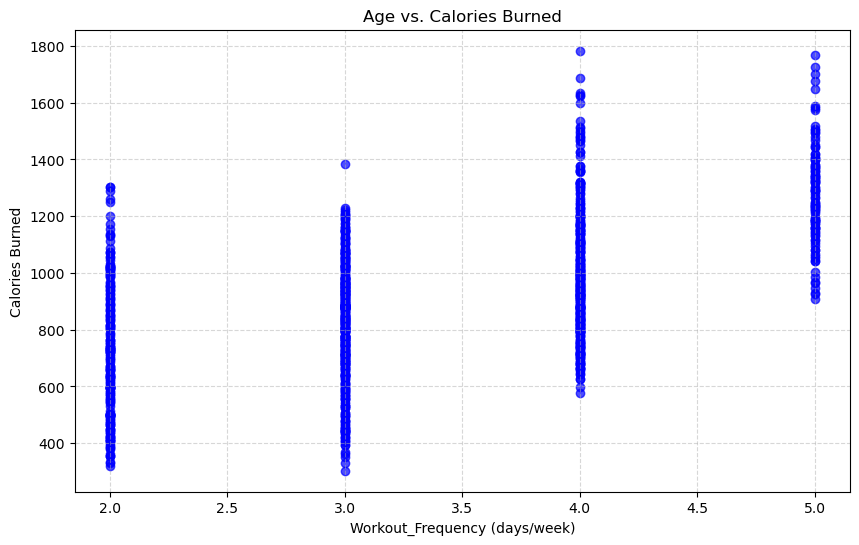

In [237]:
# Plot Age vs. Calories Burned
plot_scatter(data=df, x_col='Workout_Frequency (days/week)', y_col='Calories_Burned', 
             title='Age vs. Calories Burned', xlabel='Workout_Frequency (days/week)', ylabel='Calories Burned')


#### BOX PLOT: Box Plot of Calories Burned by Workout Type

In [240]:
def plot_calories_burned_boxplot(data, x_col, y_col):
    """
    Creates a boxplot for the specified data to visualize the distribution of a numeric column grouped by a categorical column.

    """
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=x_col, y=y_col)
    plt.title('Box Plot of Calories Burned by Workout Type')
    plt.xlabel('Workout Type')
    plt.ylabel('Calories Burned')
    plt.xticks(rotation=45)
    plt.show()


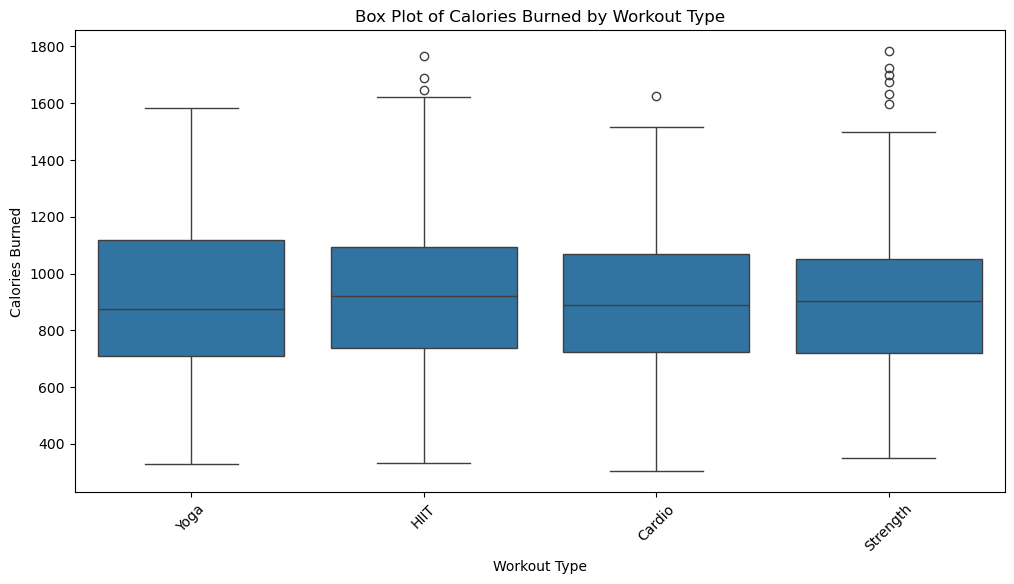

In [242]:
plot_calories_burned_boxplot(data=df, x_col='Workout_Type', y_col='Calories_Burned')

##### SCATTER PLOT- BMI vs. Calories Burned with Fitted Line

In [245]:
def compute_best_fit_line(X, y):
    """
    Computes the slope and intercept for the best-fit line using least squares.
    
    Parameters:
    X (array): Independent variable
    y (array): Dependent variable
    
    Returns:
    tuple: slope (m), intercept (b)
    """
    X_mean = np.mean(X)
    y_mean = np.mean(y)
    m = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2)
    b = y_mean - m * X_mean
    return m, b



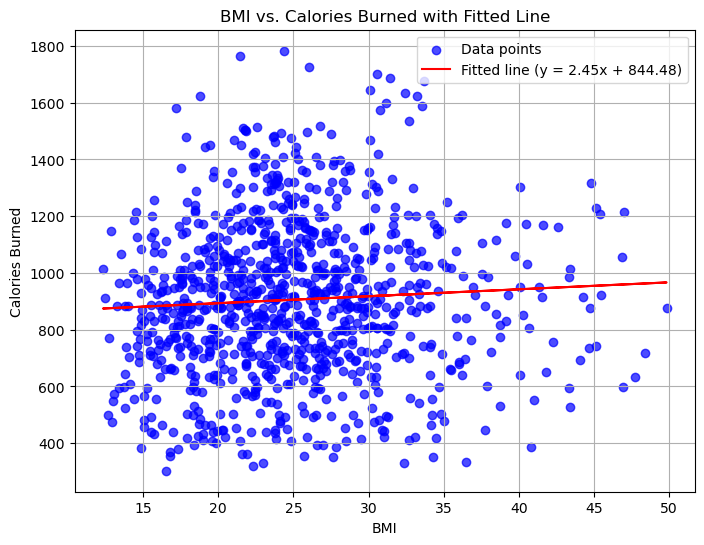

In [247]:
# Prepare data for manual computation
X = df['BMI'].values
y = df['Calories_Burned'].values

# Compute the slope and intercept
m, b = compute_best_fit_line(X, y)

# Scatter plot with the manually computed fitted line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, c='blue', label='Data points')
plt.plot(X, m * X + b, color='red', label=f'Fitted line (y = {m:.2f}x + {b:.2f})')
plt.title('BMI vs. Calories Burned with Fitted Line')
plt.xlabel('BMI')
plt.ylabel('Calories Burned')
plt.legend()
plt.grid(True)
plt.show()


#### CORRELATION

In [285]:
def plot_correlation_heatmap(df):
    """
    Plots a correlation heatmap for the numerical columns of a DataFrame.
    """
    # Select only numeric columns
    df_numeric = df.select_dtypes(include=['number'])
    
    # Compute the correlation matrix
    correlation_matrix = df_numeric.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title('Correlation Heatmap')
    plt.show()


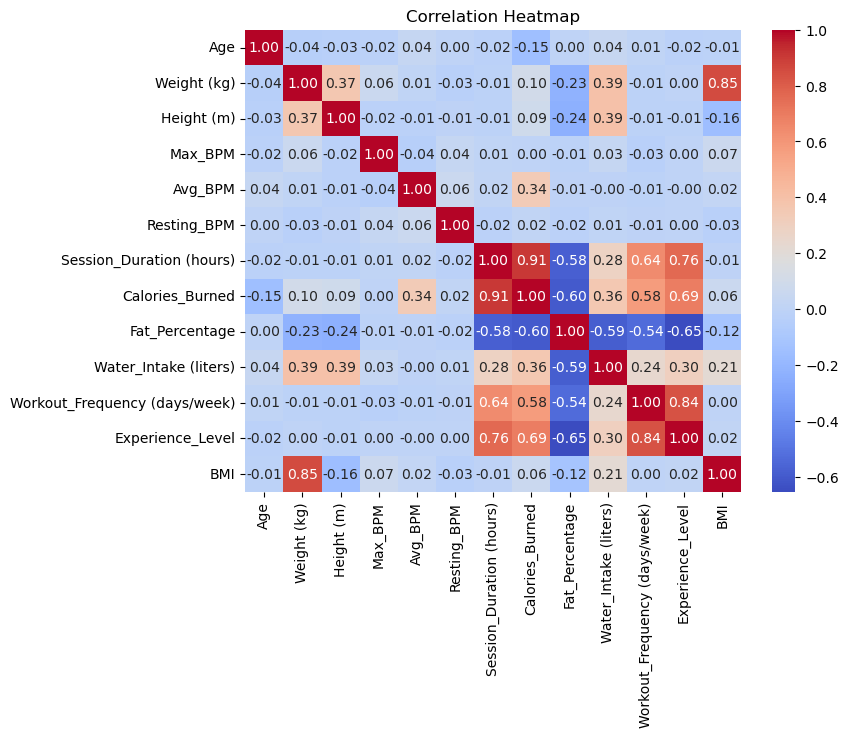

In [287]:
plot_correlation_heatmap(df)

#### ELBOW PLOT AND SCATTER PLOT

In [255]:
def calculate_kmeans_metrics(X, max_clusters=10):
    """
    Calculate inertia (elbow method) and silhouette scores for K-means clustering.
    """
    inertia = []
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    return inertia, silhouette_scores


In [257]:
def plot_elbow_and_silhouette(inertia, silhouette_scores, max_clusters=10):
    """
    Plot the elbow method and silhouette scores.
    """
    cluster_range = range(2, max_clusters + 1)

    # Elbow method
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(cluster_range, inertia, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

    # Silhouette scores
    plt.subplot(1, 2, 2)
    plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='green')
    plt.title('Silhouette Scores')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()


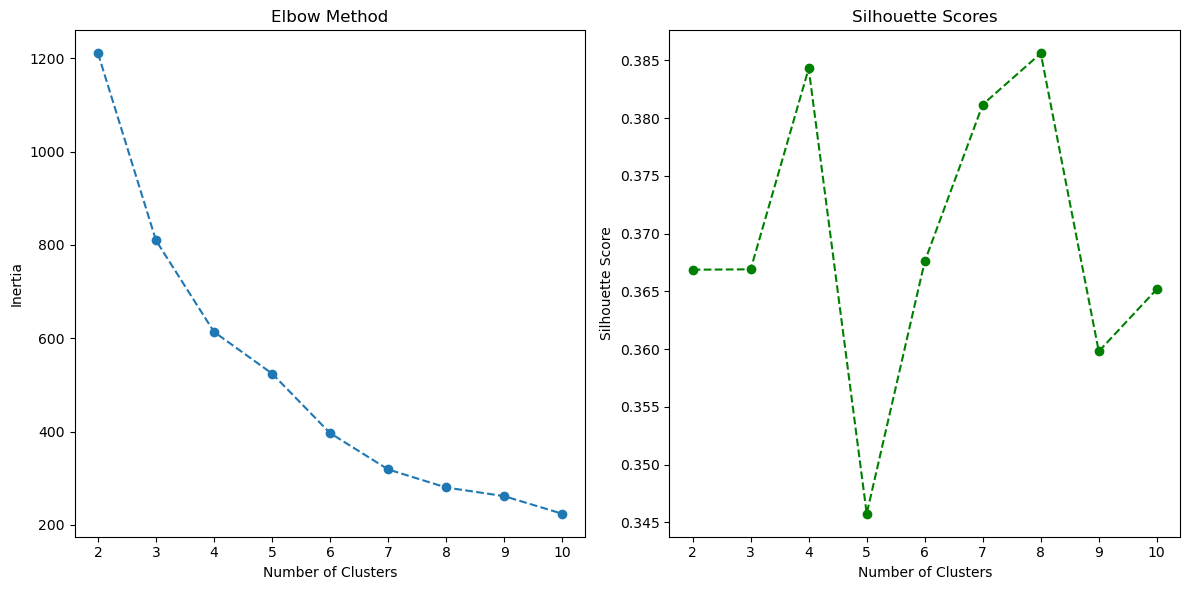

In [259]:
# Select features and normalize
features = ['Age', 'Session_Duration (hours)']
X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate metrics
max_clusters = 10
inertia, silhouette_scores = calculate_kmeans_metrics(X_scaled, max_clusters)

# Plot Elbow Method and Silhouette Scores
plot_elbow_and_silhouette(inertia, silhouette_scores, max_clusters)



#### K-Means Clustering, Calorie burnt vs session duration

In [262]:

# Function for clustering
def perform_kmeans_clustering(data, n_clusters):
    """
    Perform K-Means clustering.
    
    Parameters:
        data (pd.DataFrame): The input data for clustering.
        n_clusters (int): The number of clusters.
        
    Returns:
        tuple: Cluster labels, cluster centroids
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    centroids = kmeans.cluster_centers_
    return labels, centroids

# Function for plotting
def plot_clusters(data, labels, centroids):
    """
    Plot the clustered data.
    
    Parameters:
        data (pd.DataFrame): The input data for clustering.
        labels (np.array): Cluster labels for each point.
        centroids (np.array): Cluster centroids.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis', marker='o', label='Data points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()



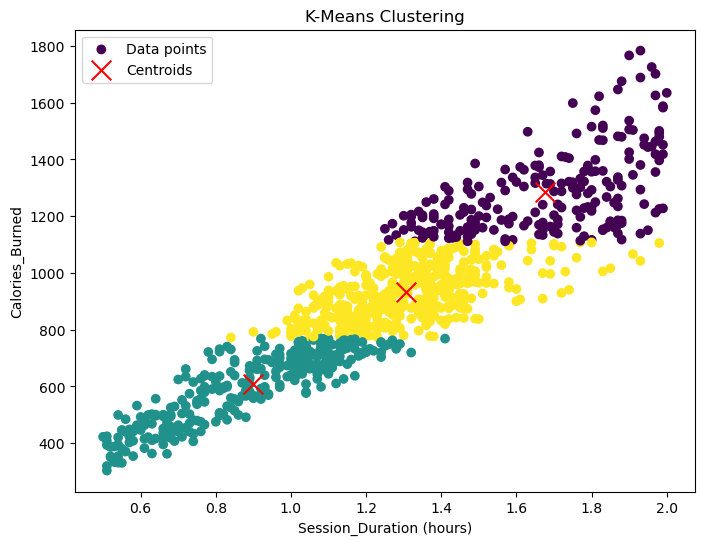

In [264]:

# Example preprocessing: Selecting relevant features
# Replace 'feature1', 'feature2' with actual column names from the data
selected_columns = [ 'Session_Duration (hours)','Calories_Burned']  # Update with relevant columns
data_selected = df[selected_columns]

# Example usage
n_clusters = 3  # Set the desired number of clusters
labels, centroids = perform_kmeans_clustering(data_selected, n_clusters)
plot_clusters(data_selected, labels, centroids)
